<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Rubén Hernández Guevara | Andrés Hernández Jiménez.

**Fecha:** 09 de Marzo del 2021.

**Expediente** : 717710 | 717895.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Rub27182n/Proyecto-SPF.git

# Proyecto TEMA-2

In [2]:
# <font color='midnightblue'>

# <font color='midnightblue'> 1. Análisis y Simulación de Videos de Youtube

> En este proyecto, examinaremos a detalle y simularemos las variables más escenciales de un video de YouTube: Likes, Dislikes, Comments y Views para obtener los estadísticos más probables de un hipotético video.

# <font color='midnightblue'> 2 . Objetivos

> ###  <font color='midnightblue'> Generales
>> Consideramos como objetivo principal, el generar un modelo/función que permita simular, a partir de parámetros o características clave de un video de YouTube, sus principales estádisticos.
    
> ###  <font color='midnightblue'> Específicos
>> - Encontrar las categorías de video más populares y etiquetarlas.
>> - Obtener la Función de Distribución de Probabilidad de cada estadístico para las categorías más populares.
>> - Simular cantidad de Likes, Dislikes, Comments y Views para las categorías más populares.
    



# <font color='midnightblue'> 3.  Definición del Problema
    
> En este proyecto queremos plantear la idea de una compañía que opera con Data Science,  y que a través de una base de datos de videos de YouTube, le es posible obtener distribuciones de probabilidad y simular casos específicos de hipotéticos videos, a los cuales se pretende estimar su recibimiento (número de vistas, likes, dislikes y comentarios) en la plataforma. 
    
> Todos los datos que se utilizarán son datos reales de videos en Youtube México y YouTube Estados Unidos. Con los 4 estadísticos previamente mencionados, se podrá obtener la información necesaria para evaluar las diferentes categorías de videos y su recibimiento en la plataforma a través de simulación Monte Carlo. Estos parámetros serán los nodos para trabajar específicamente y a través de estos se generarán datos que nos permiten cumplir con el objetivo central, examinar a detalle y simular las variables escenciales de un video de YouTube. 

# <font color='midnightblue'> 4. Nodos/Variables a Simular

> Los nodos/variables que elegimos son:
> - Número de Vistas
> - Cantidad de Likes
> - Cantidad de Dislikes
> - Número de Comentarios
> - Categoría de Videos

> Estos nodos fueron elegidos porque generamos la hipótesis de que intrínsecamente están correlacioandos y además se pueden simular ante el supuesto de un video ingresado en la red y su desempeño en la plataforma. La categoría de video es un filtro fundamental para poder separar los resultados de acuerdo con lo que la gente quiere ver basándonos en su popularidad actual. La ratio entre likes y dislikes nos darán una muy buena idea de cómo se desempeña el video una vez en la plataforma. El número de vistas y sus respectivos comentarios afirmarán si este video está volviéndose popular.

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import beta
from scipy import optimize
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('MXvideos.csv')
datax=np.log(data.iloc[:,7])
datax

0        12.644747
1        11.561449
2        11.820881
3        11.473696
4        13.122293
           ...    
40446    13.389507
40447    11.709101
40448     9.551587
40449    10.038805
40450    11.598516
Name: views, Length: 40451, dtype: float64

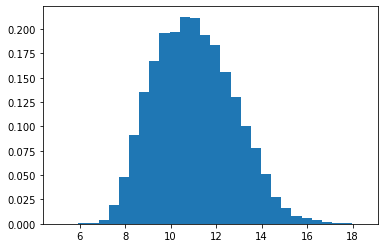

In [5]:
plt.hist(datax,30,density=True);

## Utilizando scikit-learn

In [6]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    #score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [7]:
x_grid=np.linspace(0,20,1000)
nodo1=np.random.choice(datax,1000)
x=nodo1
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0, 2.0, 10)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 0.4444444444444444}


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'KDE using scikit-learn')

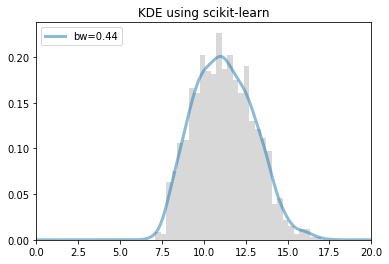

In [8]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(0, 20);
ax.set_title('KDE using scikit-learn')

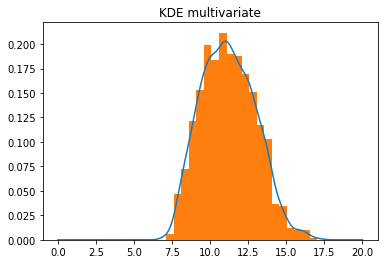

In [9]:
kde_multivariate=KDEMultivariate(data=x ,var_type='c', bw='cv_ml')
f_multi_kde= lambda x: kde_multivariate.pdf(x)
plt.plot(x_grid, f_multi_kde(x_grid))
plt.hist(x,bins=20, density=True)
plt.title('KDE multivariate')
plt.show()

In [10]:
f_multi_kde

<function __main__.<lambda>(x)>

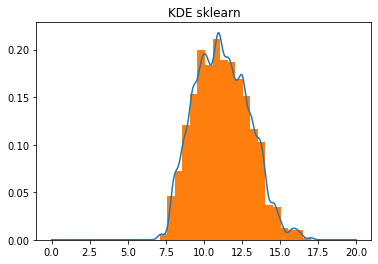

In [11]:
kde_sklearn= KernelDensity(kernel='gaussian', bandwidth=0.19).fit(x[:, np.newaxis])
f_skle= lambda x: np.exp(kde_sklearn.score_samples(x[:, None]))

plt.plot(x_grid, f_skle(x_grid))
plt.hist(x,bins=20, density=True)
plt.title('KDE sklearn')
plt.show()

In [12]:
f_skle

<function __main__.<lambda>(x)>

## Utilizando Scipy

In [13]:
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

In [14]:
x_grid=np.linspace(0,20,1000)
nodo1=np.random.choice(datax,1000)
x=nodo1
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0, 2.0, 10)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 0.6666666666666666}


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'KDE using Scipy')

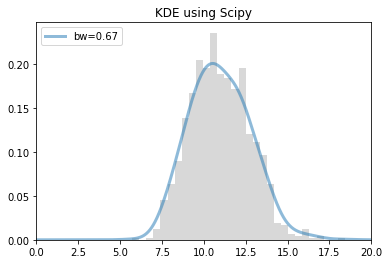

In [15]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(0, 20);
ax.set_title('KDE using Scipy')

## Utilizando Statsmodels Univariate

In [16]:
def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)

In [17]:
x_grid=np.linspace(0,20,1000)
nodo1=np.random.choice(datax,1000)
x=nodo1
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0, 2.0, 10)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 0.4444444444444444}


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'KDE using Univariate Statmodel')

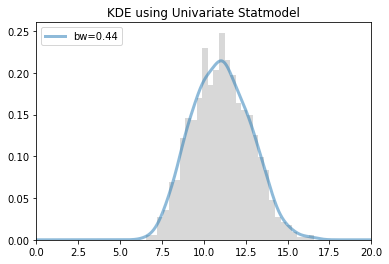

In [18]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(0, 20);
ax.set_title('KDE using Univariate Statmodel')

## Utilizando Statsmodels Multivariate

In [19]:
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)

In [20]:
x_grid=np.linspace(0,20,1000)
nodo1=np.random.choice(datax,1000)
x=nodo1
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0, 2.0, 10)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 0.4444444444444444}


C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'KDE using Multivariate Statmodel')

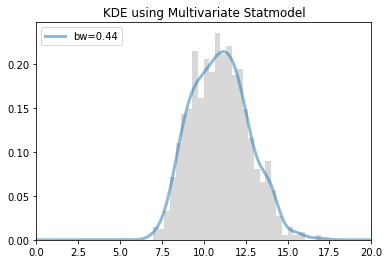

In [21]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(0, 20);
ax.set_title('KDE using Multivariate Statmodel')

## Metodo Aceptación Rechazo

In [22]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]            
    plt.show()
    
    x=[R1[i] for i in range(len(R1)) if condition[i]]

El máximo de f es: 0.20293515668175474


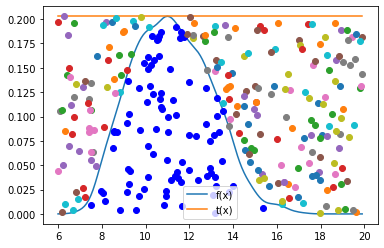

In [23]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
N=100
# Función objetivo 
f = f_multi_kde
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t -> Función constante
t = lambda x: max_f * np.ones([len(x)])

# Rango donde se graficará las funciones
x = np.arange(6,20, 0.1)
print('El máximo de f es:',max_f)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 300 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.uniform(6,20, size=N)
Acep_rechazo(R2,R1, f,t)
# Prueba de función creada
#max_f=
#plt.hist(x_r,bins=50 density=True)

In [33]:
f_multi_kde(x)
f_multi_kde.pdf

#valores=[f_multi_kde(x) for i in range(1000)]


AttributeError: 'function' object has no attribute 'pdf'